In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_excel('superstore_sales.xlsx')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [70]:
df.head(20)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0,106,35,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0,36,10,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0,30,8,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0,-26,5,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0,38,5,Medium,2011
5,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55,2,0,15,2,Medium,2011
6,CA-2011-1510,2011-01-02,2011-01-06,Standard Class,Magdelene Morse,Consumer,Ontario,Canada,Canada,Canada,...,Technology,Machines,"Okidata Inkjet, Wireless",314,1,0,3,24,Medium,2011
7,IN-2011-79397,2011-01-03,2011-01-03,Same Day,Kean Nguyen,Corporate,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Appliances,"Hoover Microwave, White",276,1,0,110,125,Critical,2011
8,ID-2011-80230,2011-01-03,2011-01-09,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Technology,Copiers,"Hewlett Wireless Fax, Laser",912,4,0,-319,107,Low,2011
9,IZ-2011-4680,2011-01-03,2011-01-07,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",667,4,0,253,81,High,2011


# What is the overall sales trend?

In [12]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51290, dtype: bool

In [37]:
grouped_df=df.groupby('market')['sales'].sum().reset_index()
pd.set_option('display.float_format', '{:,.0f}'.format)

In [38]:
grouped_df

,market,sales
0,APAC,"3,585,744"
1,Africa,"783,773"
2,Canada,"66,928"
3,EMEA,"806,161"
4,EU,"2,938,089"
5,LATAM,"2,164,605"
6,US,"2,297,201"


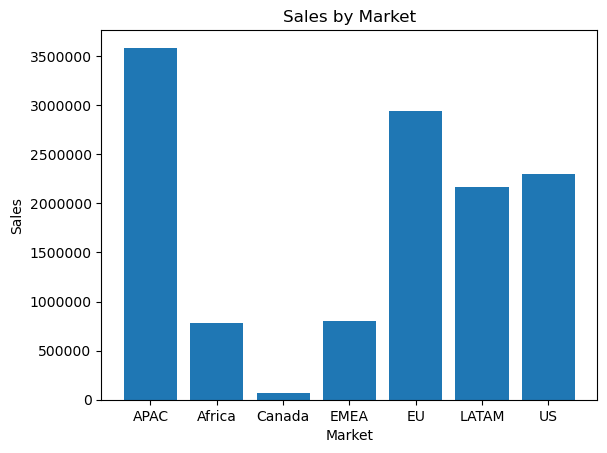

In [47]:
plt.bar(grouped_df['market'], grouped_df['sales' ]
       )
plt.xlabel('Market')
plt.ylabel('Sales')
plt.title('Sales by Market')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [63]:
grouped_year=df.groupby('year')['sales'].sum().reset_index().sort_values(by='sales', ascending=True)

In [64]:
grouped_year

,year,sales
0,2011,"2,259,451"
1,2012,"2,677,439"
2,2013,"3,405,746"
3,2014,"4,299,866"


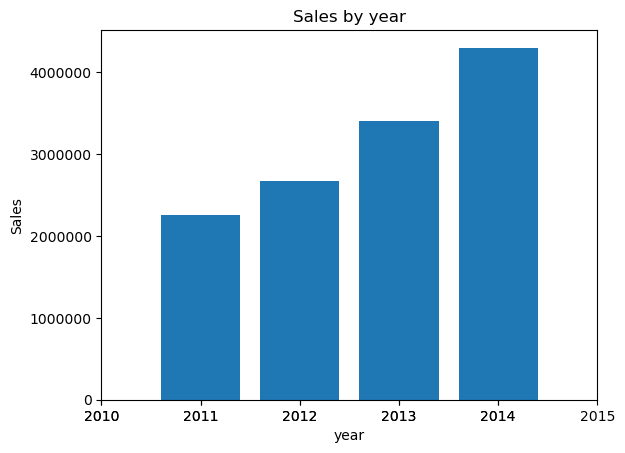

In [67]:
plt.bar(grouped_year['year'], grouped_year['sales']
       )
plt.xlabel('year')
plt.ylabel('Sales')
plt.title('Sales by year')
plt.ticklabel_format(style='plain', axis='y')
# Set x-axis ticks as integers
plt.xticks(list(map(int, plt.xticks()[0])))
plt.show()

#Which are the Top 10 products by sales?

In [85]:
grouped_prod=df.groupby('product_name')['sales'].sum().sort_values(ascending=False).reset_index()

In [87]:
grouped_prod.head(10)

,product_name,sales
0,"Apple Smart Phone, Full Size","86,936"
1,"Cisco Smart Phone, Full Size","76,442"
2,"Motorola Smart Phone, Full Size","73,156"
3,"Nokia Smart Phone, Full Size","71,905"
4,Canon imageCLASS 2200 Advanced Copier,"61,600"
5,"Hon Executive Leather Armchair, Adjustable","58,193"
6,"Office Star Executive Leather Armchair, Adjust...","50,662"
7,"Harbour Creations Executive Leather Armchair, ...","50,122"
8,"Samsung Smart Phone, Cordless","48,653"
9,"Nokia Smart Phone, with Caller ID","47,878"


# Which are the Most Selling Products?

In [88]:
grouped_prod2=df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).reset_index()

In [90]:
grouped_prod2.head(10)

,product_name,quantity
0,Staples,876
1,"Cardinal Index Tab, Clear",337
2,"Eldon File Cart, Single Width",321
3,"Rogers File Cart, Single Width",262
4,"Sanford Pencil Sharpener, Water Color",259
5,"Stockwell Paper Clips, Assorted Sizes",253
6,"Avery Index Tab, Clear",252
7,"Ibico Index Tab, Clear",251
8,"Smead File Cart, Single Width",250
9,"Stanley Pencil Sharpener, Water Color",242


In [107]:
df['count']=df['ship_mode'].count()

# Which is the most preferred Ship Mode?

In [123]:
prod=df['ship_mode'].value_counts()

In [124]:
prod

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

In [127]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0,106,35,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0,36,10,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0,30,8,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0,-26,5,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0,38,5,Medium,2011


# Most profitable category

In [128]:
grouped_cat=df.groupby('category')['profit'].sum().sort_values(ascending=False).reset_index()

In [129]:
grouped_cat

,category,profit
0,Technology,"663,779"
1,Office Supplies,"518,474"
2,Furniture,"286,782"


In [130]:
##most priftable category is the Technology###

# Profitable Sub-category

In [131]:
grouped_subcat=df.groupby('sub_category')['profit'].sum().sort_values(ascending=False).reset_index()

In [132]:
grouped_subcat

,sub_category,profit
0,Copiers,"258,568"
1,Phones,"216,717"
2,Bookcases,"161,924"
3,Chairs,"141,974"
4,Appliances,"141,681"
5,Accessories,"129,626"
6,Storage,"108,461"
7,Binders,"72,450"
8,Paper,"59,208"
9,Machines,"58,868"
